In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress




In [2]:
from pathlib import Path
game_sales = Path("Video_Games.csv")
game_sales_df = pd.read_csv(game_sales)
game_sales_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Remove all rows with Nan values
cleaned_game_sales_df = game_sales_df.dropna()
cleaned_game_sales_df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E
16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T


In [4]:
# Calculate total number of platforms
platform_count = cleaned_game_sales_df['Platform'].nunique()
platform_count

17

In [5]:
# Calculate total number of publishers
publisher_count = cleaned_game_sales_df['Publisher'].nunique()
publisher_count

262

In [6]:
# Developer Count
developer_count = cleaned_game_sales_df['Developer'].nunique()
developer_count

1289

In [7]:
# Total number of games 
game_count = cleaned_game_sales_df['Name'].nunique()
game_count

4377

In [8]:
# Calculate Total sales for each region
na_sales= sum(cleaned_game_sales_df['NA_Sales'])
eu_sales= sum(cleaned_game_sales_df['EU_Sales'])
jp_sales= sum(cleaned_game_sales_df['JP_Sales'])
other_sales = sum(cleaned_game_sales_df['Other_Sales'])
total_sales= na_sales + eu_sales + jp_sales + other_sales

print(f'''
Total number of NA sales: {na_sales}

Total number of EU sales: {eu_sales}

Total number of JP sales: {jp_sales}

Total number of other sales: {other_sales}

Total sales: {total_sales}
''')


Total number of NA sales: 2692.3500000001272

Total number of EU sales: 1611.309999999911

Total number of JP sales: 437.8799999999932

Total number of other sales: 564.2699999999522

Total sales: 5305.809999999983



In [9]:
# average critic score
avg_critic_score = cleaned_game_sales_df['Critic_Score'].mean()
avg_critic_score

70.27208791208791

In [10]:
avg_user_score= cleaned_game_sales_df['User_Score'].astype('float64').mean()
avg_user_score

7.185626373626373

In [14]:
# Calculate percentage of games with higher than 80% critic score
positive_critic_review_count = cleaned_game_sales_df[(cleaned_game_sales_df['Critic_Score'] >= 80)].count()["Name"]
positive_critic_game_percentage  = positive_critic_review_count / float(game_count) * 100
positive_critic_game_percentage

43.9798949051862

In [15]:
# Calculate percentage of games with higher than 8 User score
positive_user_review_count = cleaned_game_sales_df[(cleaned_game_sales_df['User_Score'].astype('float64') >= 8)].count()["Name"]
positive_user_game_percentage  = positive_user_review_count / float(game_count) * 100
positive_user_game_percentage

54.466529586474756

In [16]:
game_sales_summary = pd.DataFrame([
    {'Total Number of Platforms': platform_count, 
     'Total Number of Publishers': publisher_count, 
     'Total Number of Games': game_count, 
     'Total Sale From NA': na_sales, 
     'Total Sales From EU': eu_sales, 
     'Total Number of Sales From JP': jp_sales, 
     'Total Number of Sales from Other regions': other_sales, 
     'Total Sales': total_sales, 
     'Over 80% Critic Score' : positive_critic_game_percentage, 
     'Over 80% User Score': positive_user_game_percentage}
])
game_sales_summary

,Total Number of Platforms,Total Number of Publishers,Total Number of Games,Total Sale From NA,Total Sales From EU,Total Number of Sales From JP,Total Number of Sales from Other regions,Total Sales,Over 80% Critic Score,Over 80% User Score
0,17,262,4377,2692.35,1611.31,437.88,564.27,5305.81,43.979895,54.46653


In [17]:
# Games per Rating
per_rating_counts = cleaned_game_sales_df.groupby('Rating')['Name'].count()
per_rating_counts

Rating
AO         1
E       2082
E10+     930
K-A        1
M       1433
RP         1
T       2377
Name: Name, dtype: int64

In [18]:
# Total game count per platform
per_platform_counts = cleaned_game_sales_df.groupby('Platform')['Name'].count()
per_platform_counts

Platform
3DS      155
DC        14
DS       464
GBA      237
GC       348
PC       651
PS       150
PS2     1140
PS3      769
PS4      239
PSP      390
PSV      118
Wii      479
WiiU      89
X360     858
XB       565
XOne     159
Name: Name, dtype: int64

In [19]:
# Total game count per genre 
per_genre_counts = cleaned_game_sales_df.groupby('Genre')['Name'].count()
per_genre_counts

Genre
Action          1630
Adventure        248
Fighting         378
Misc             384
Platform         403
Puzzle           118
Racing           581
Role-Playing     712
Shooter          864
Simulation       297
Sports           943
Strategy         267
Name: Name, dtype: int64

In [20]:
publisher_sales_df = cleaned_game_sales_df[['Publisher', 'Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
publisher_sales_df

,Publisher,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Nintendo,Wii Sports,41.36,28.96,3.77,8.45
2,Nintendo,Mario Kart Wii,15.68,12.76,3.79,3.29
3,Nintendo,Wii Sports Resort,15.61,10.93,3.28,2.95
6,Nintendo,New Super Mario Bros.,11.28,9.14,6.50,2.88
7,Nintendo,Wii Play,13.96,9.18,2.93,2.84
...,...,...,...,...,...,...
16667,NewKidCo,E.T. The Extra-Terrestrial,0.01,0.00,0.00,0.00
16677,Midway Games,Mortal Kombat: Deadly Alliance,0.01,0.00,0.00,0.00
16696,Konami Digital Entertainment,Metal Gear Solid V: Ground Zeroes,0.00,0.01,0.00,0.00
16700,Destineer,Breach,0.01,0.00,0.00,0.00


In [21]:
# Total sales per publisher per region

publisher_sales_df = publisher_sales_df.groupby('Publisher').sum()
publisher_sales_df


C:\Users\Espy\AppData\Local\Temp\ipykernel_28056\2401239934.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  publisher_sales_df = publisher_sales_df.groupby('Publisher').sum()


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Publisher,,,,
10TACLE Studios,0.01,0.01,0.00,0.00
1C Company,0.01,0.04,0.00,0.01
2D Boy,0.00,0.03,0.00,0.01
3DO,1.30,0.94,0.00,0.29
505 Games,16.59,10.83,0.92,3.28
...,...,...,...,...
Zoo Games,1.25,0.00,0.00,0.09
Zushi Games,0.18,0.01,0.00,0.01
bitComposer Games,0.00,0.05,0.00,0.02


In [ ]:
# compare sales to critic_scores platforms 

In [22]:
# filter df to onl;y include m rated games
m_rated_df = cleaned_game_sales_df[cleaned_game_sales_df['Rating'] == 'M']

# Calculate average 

In [24]:
# compare sales to user_score using pearson correlation and linear regression, getting r^2 value

# Calculate average Critic rating for each game rated M

avg_m_game_rating = m_rated_df.groupby('Name')['Critic_Score'].mean()

merged_m_rated_df = pd.merg()

Name
187: Ride or Die                      51.500000
24: The Game                          62.000000
25 to Life                            40.000000
300: March to Glory                   55.000000
50 Cent: Blood on the Sand            71.500000
                                        ...    
Zone of the Enders                    78.000000
Zone of the Enders HD Collection      74.000000
Zone of the Enders: The 2nd Runner    82.000000
[Prototype 2]                         76.333333
[Prototype]                           78.500000
Name: Critic_Score, Length: 824, dtype: float64

In [ ]:
# categorical Enova. ex: stat difference between user score by genre. 
# difference in the means of user score by genre. 
# Do users rank genre higher than another? 
# users rate higher than another
# Evnove on genre to average user. if pvalue is low, rject null and say there is stat propability that genre 
# reject the null or fail to reject the null. 

In [29]:
genre_counts = cleaned_game_sales_df['Genre'].value_counts()
genre_counts

Action          1630
Sports           943
Shooter          864
Role-Playing     712
Racing           581
Platform         403
Misc             384
Fighting         378
Simulation       297
Strategy         267
Adventure        248
Puzzle           118
Name: Genre, dtype: int64

Genre
Action          19.965611
Sports          15.545970
Shooter         13.451990
Platform        10.118975
Misc             9.250628
Racing           8.162185
Role-Playing     7.513935
Fighting         5.073343
Simulation       4.138218
Puzzle           2.790838
Adventure        2.390849
Strategy         1.557027
Name: NA_Sales, dtype: float64


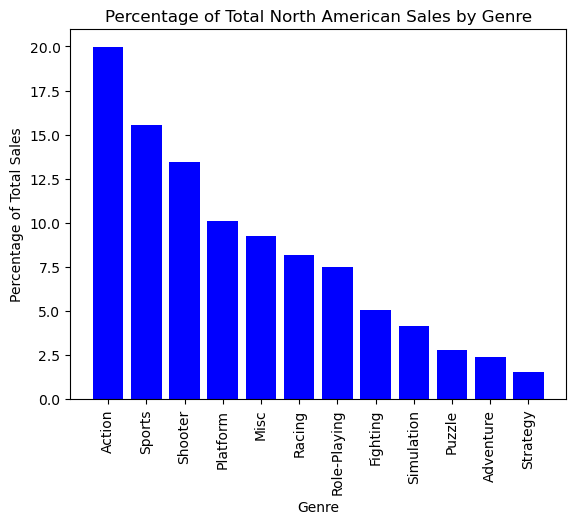

In [16]:
ttl_NA_sales = game_sales_df['NA_Sales'].sum()

NA_genre_ttl_sales = game_sales_df.groupby('Genre')['NA_Sales'].sum()

NA_Genre_pert = (NA_genre_ttl_sales/ttl_NA_sales)*100

print(NA_Genre_pert.sort_values(ascending = False))

NA_pert_sales_genre = NA_Genre_pert.sort_values(ascending = False)


plt.bar(NA_pert_sales_genre.index, NA_pert_sales_genre.values, color = 'blue', alpha = 1, align = 'center')

plt.xlabel('Genre') 
plt.ylabel('Percentage of Total Sales') 
plt.title('Percentage of Total North American Sales by Genre')
plt.xticks(rotation=90)
plt.show()

Genre
Action          21.410336
Sports          15.539847
Shooter         13.087967
Racing           9.754317
Misc             8.773977
Platform         8.262980
Role-Playing     7.782915
Simulation       4.681874
Fighting         4.137883
Adventure        2.620563
Puzzle           2.062549
Strategy         1.862934
Name: EU_Sales, dtype: float64


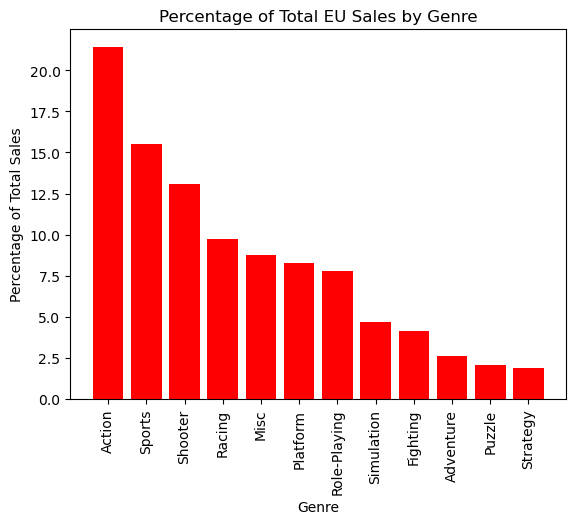

In [15]:
ttl_EU_sales = game_sales_df['EU_Sales'].sum()

EU_genre_ttl_sales = game_sales_df.groupby('Genre')['EU_Sales'].sum()

EU_Genre_pert = (EU_genre_ttl_sales/ttl_EU_sales)*100

print(EU_Genre_pert.sort_values(ascending = False))

EU_pert_sales_genre = EU_Genre_pert.sort_values(ascending = False)

plt.bar(EU_pert_sales_genre.index, EU_pert_sales_genre.values, color = 'red', alpha = 1, align = 'center')

plt.xlabel('Genre') 
plt.ylabel('Percentage of Total Sales') 
plt.title('Percentage of Total EU Sales by Genre')
plt.xticks(rotation=90)
plt.show()

Genre
Role-Playing    27.397239
Action          12.443061
Sports          10.446806
Platform        10.083781
Misc             8.332627
Fighting         6.742560
Simulation       4.917414
Puzzle           4.417194
Racing           4.370949
Adventure        4.031046
Strategy         3.827567
Shooter          2.987444
Name: JP_Sales, dtype: float64


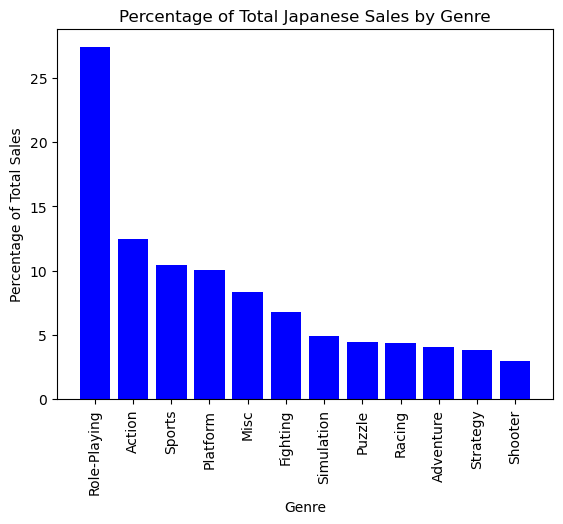

In [14]:
ttl_JP_sales = game_sales_df['JP_Sales'].sum()

JP_genre_ttl_sales = game_sales_df.groupby('Genre')['JP_Sales'].sum()

JP_Genre_pert = (JP_genre_ttl_sales/ttl_JP_sales)*100

print(JP_Genre_pert.sort_values(ascending = False))


JP_pert_sales_genre = JP_Genre_pert.sort_values(ascending = False)


plt.bar(JP_pert_sales_genre.index, JP_pert_sales_genre.values, color = 'blue', alpha = 1, align = 'center')

plt.xlabel('Genre') 
plt.ylabel('Percentage of Total Sales') 
plt.title('Percentage of Total Japanese Sales by Genre')
plt.xticks(rotation=90)
plt.show()

In [12]:
Genre_salespercentage_df= pd.DataFrame({'NA_Genre_%_sales': NA_Genre_pert,
              'EU_Genre_%_sales': EU_Genre_pert,
              'JP_Genre_%_sales':JP_Genre_pert})

Genre_salespercentage_df

,NA_Genre_%_sales,EU_Genre_%_sales,JP_Genre_%_sales
Genre,,,
Action,19.965611,21.410336,12.443061
Adventure,2.390849,2.620563,4.031046
Fighting,5.073343,4.137883,6.742560
Misc,9.250628,8.773977,8.332627
Platform,10.118975,8.262980,10.083781
Puzzle,2.790838,2.062549,4.417194
Racing,8.162185,9.754317,4.370949
Role-Playing,7.513935,7.782915,27.397239
Shooter,13.451990,13.087967,2.987444


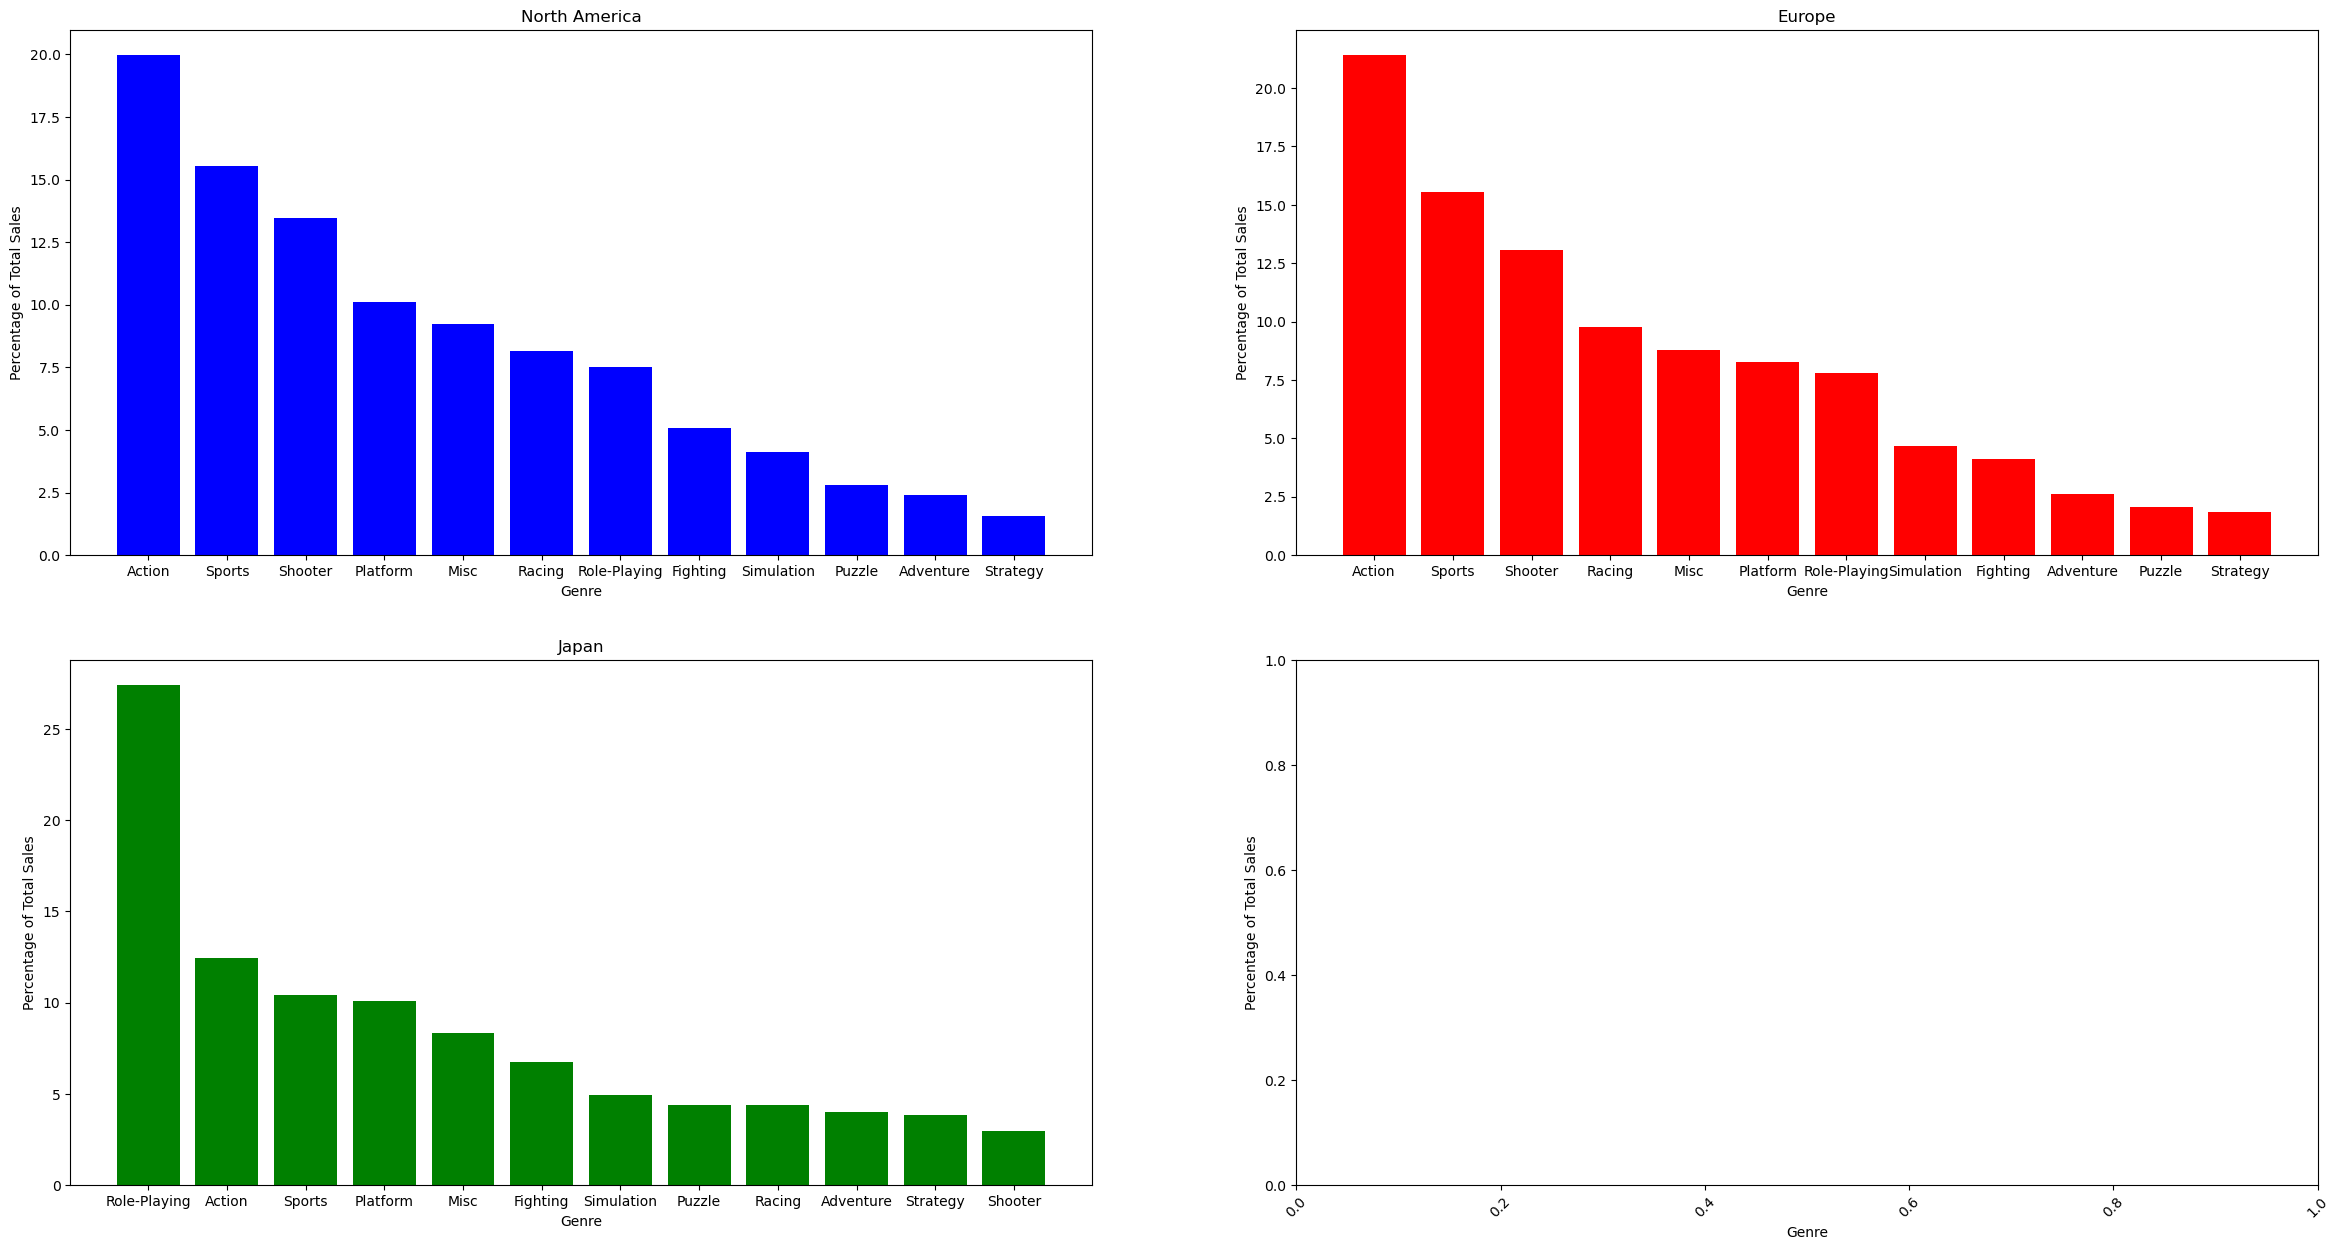

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(29, 15))

axs[0, 0].bar(NA_pert_sales_genre.index, NA_pert_sales_genre.values, color = 'blue', alpha = 1)
axs[0, 0].set_title('North America')

axs[0, 1].bar(EU_pert_sales_genre.index, EU_pert_sales_genre.values, color = 'red', alpha = 1)
axs[0, 1].set_title('Europe')

axs[1, 0].bar(JP_pert_sales_genre.index, JP_pert_sales_genre.values, color = 'green', alpha = 1)
axs[1, 0].set_title('Japan')



for ax in axs.flat:
    ax.set(xlabel='Genre', ylabel='Percentage of Total Sales')

#for ax in axs.flat:
    #ax.label_outer()

ax.tick_params(axis='x', rotation=45)    
    
plt.show()

In [99]:
Yr = game_sales_df['Year_of_Release'].value_counts()

game_sales_df['Year_of_Release'].dtypes


dtype('float64')